# **GRIP @ THE SPARK FOUNDATION**

Task1#

Author: Ramesh Kori


---


Problem Statement:

Predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

import the required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

load the Dataset

In [30]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


performing the Auto EDA

In [ ]:
!pip install sweetviz

In [34]:
import sweetviz
my_report = sweetviz.analyze([data,'Train'], target_feat='Scores')
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pip install autoviz

Shape of your Data Set loaded: (25, 2)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Hours,23,float64,0,0.000000,92.000000,0,
Scores,23,int64,0,0.000000,92.000000,0,


    2 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


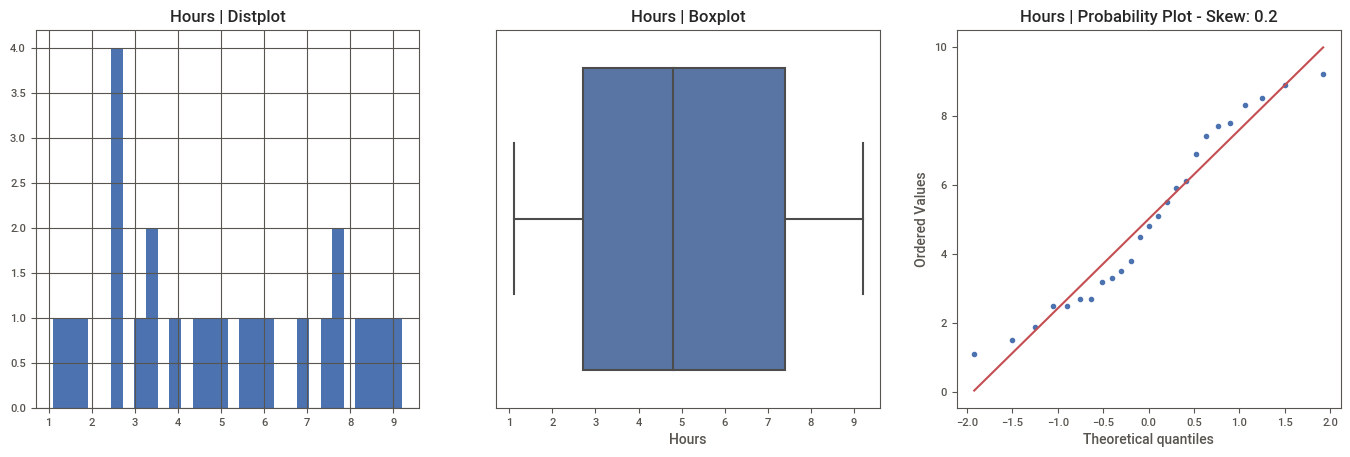

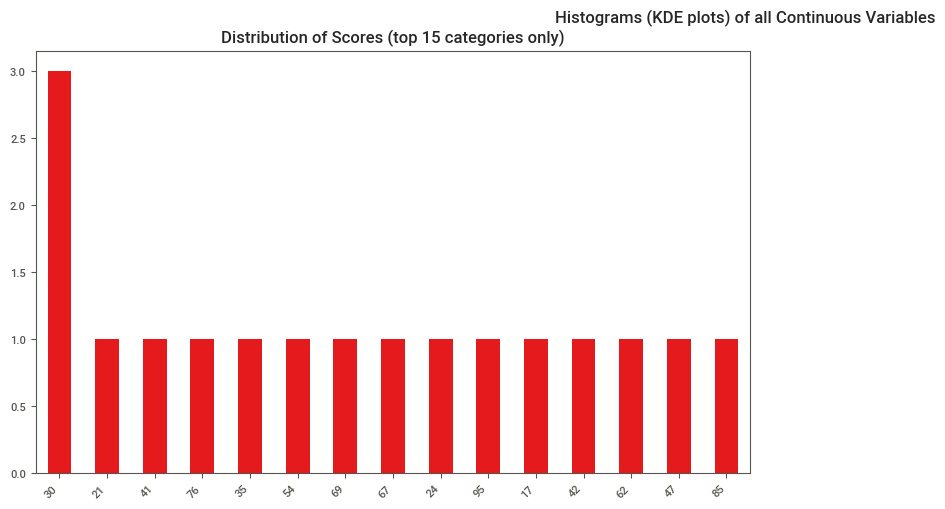

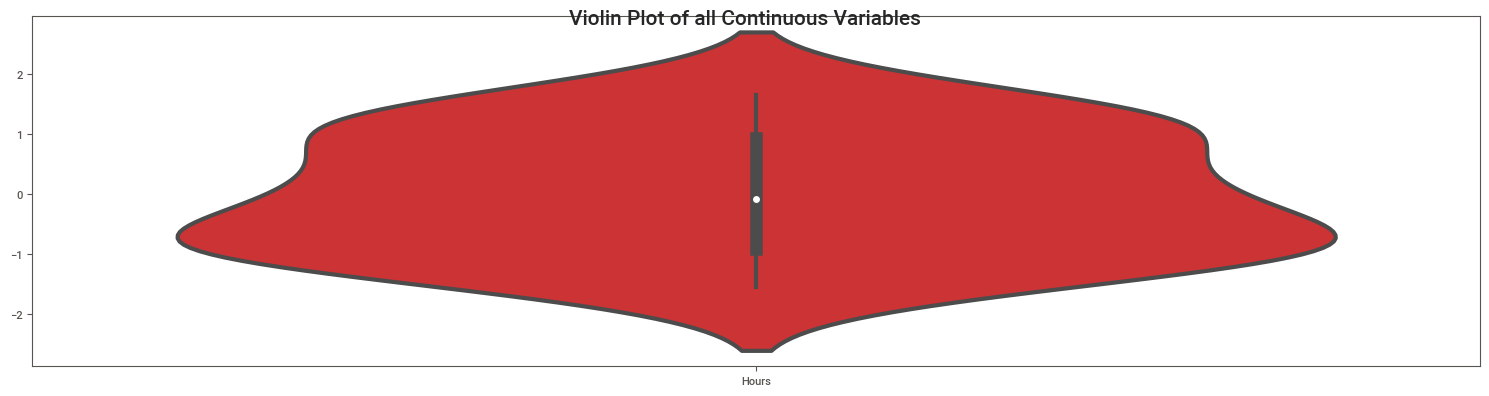

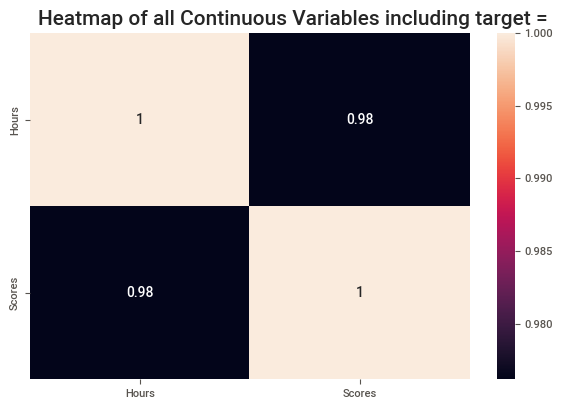

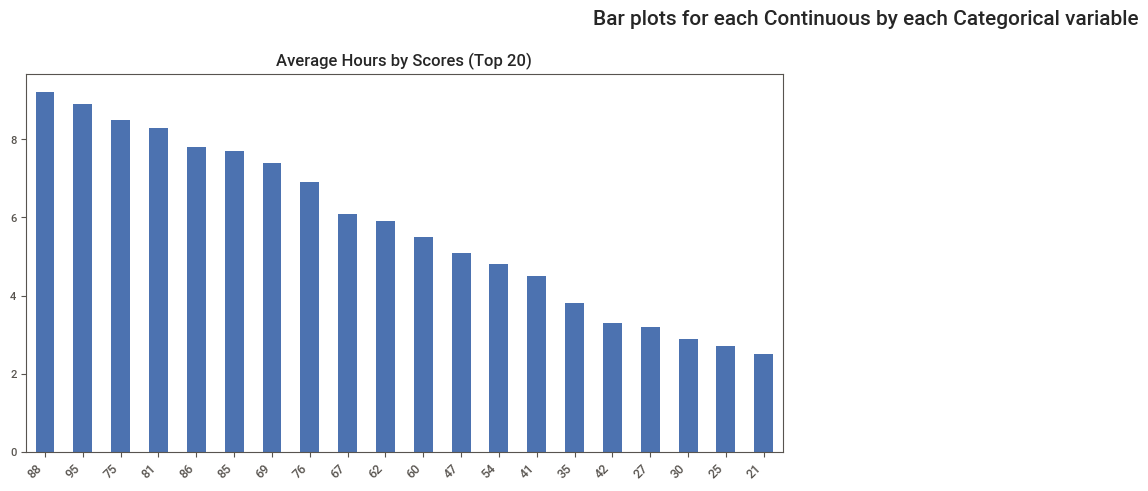

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
data = AV.AutoViz('/content/student_scores.csv')

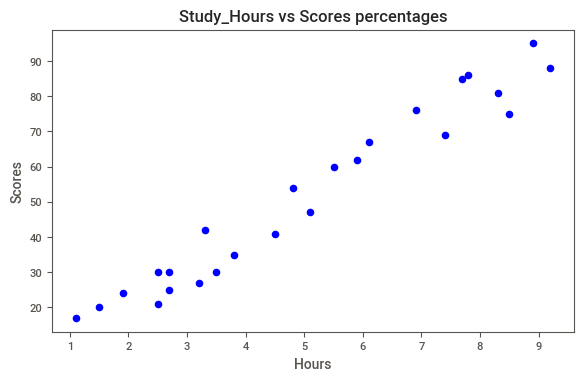

In [37]:
data.plot.scatter(x = 'Hours', y = 'Scores', title= 'Study_Hours vs Scores percentages',  color='blue');

In [38]:
y = data['Scores'].values.reshape(-1, 1)
X = data['Hours'].values.reshape(-1, 1)

##Training a Linear Regression Model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

We need to fit the line to our data

In [41]:
regressor.fit(X_train, y_train)

LinearRegression()

Plotting the regression line

In [42]:
line = regressor.coef_*X+regressor.intercept_ #Y= M*X + C

Plotting the test data

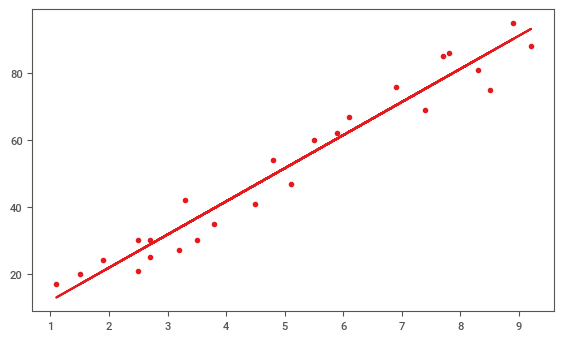

In [43]:
plt.scatter(X, y) 
plt.plot(X, line);
plt.show()

In [44]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


check the regressor intercept, which represents the mean value of the response variable when all of the predictor variables in the model are equal to zero

In [45]:
print(regressor.intercept_)

[2.01816004]


The parameter β (the regression coefficient) signifies the amount by which change in x must be multiplied to give the corresponding average change in y, or the amount of y changes for a unit increase in x.

In [46]:
print(regressor.coef_)

[[9.91065648]]


### Prediction
Predict new values using predict() method passing 9.25 in double brackets to have a 2D array:

In [47]:
score = regressor.predict([[9.25]])
print(score)

[[93.69173249]]


Instead of typing the value directly, we can ask for Study hours

In [48]:
score_ans = float(input('How many hours did you study? (From 0 to 10) '))
score = regressor.predict([[score_ans]])
print('Studying {} hours, you have a high chance of gettting a {}% score.'.format(score_ans, score)) 

How many hours did you study? (From 0 to 10) 9.25
Studying 9.25 hours, you have a high chance of gettting a [[93.69173249]]% score.


To make predictions on the test data, we pass the X_test values to the predict() method.

In [49]:
y_pred = regressor.predict(X_test)

The y_pred variable contains all the predicted values for the input values in the X_test.
We can compare the actual output values for X_test with the predicted values, by arranging them side by side in a dataframe structure:

In [50]:
data_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(data_preds)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


**Observation:**
The expected model is not precise since we have a minimal dataset. However, the predicted percentages are close to the actual ones. 

In [51]:
import seaborn as sns

### Define predictions

In [52]:
predictions = regressor.predict(X_test)
predictions

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

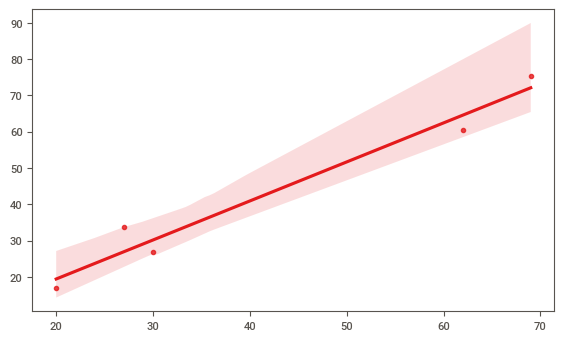

In [53]:
# Plot it
sns.regplot(y_test,predictions);

**Observation:**
The above graph shows the model is predicting results within acceptable range. 

####################################
## Model Evaluation
- For regression models, three evaluation metrics are mainly used:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Metrics calculations

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print the metrics results using the f string and the 2 digit precision after the comma with :.2f:


In [56]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4.18
Mean squared error: 21.60
Root mean squared error: 4.65


**Observation:**
All the errors are low, and the metrics show a small value range despite the small data.

## **THANK YOU**